In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pycaret
%matplotlib inline

In [29]:
# loading edited kaggle ctr prediction dataset - only the click and time data have been included. 
df = pd.read_csv('CTR_train.csv')

In [30]:
#To show the first few records
df.head()

,id,click,hour
0,1.000000e+18,0,14102100
1,1.000000e+19,0,14102100
2,1.000000e+19,0,14102100
3,1.000000e+19,0,14102100
4,1.000000e+19,0,14102100


In [31]:
#to provide more inform on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1048575 non-null  float64
 1   click   1048575 non-null  int64  
 2   hour    1048575 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 24.0 MB


In [32]:
#change hour to datetime data type
df['hour'] = pd.to_datetime(df['hour'])

In [33]:
df.head()

,id,click,hour
0,1.000000e+18,0,1970-01-01 00:00:00.014102100
1,1.000000e+19,0,1970-01-01 00:00:00.014102100
2,1.000000e+19,0,1970-01-01 00:00:00.014102100
3,1.000000e+19,0,1970-01-01 00:00:00.014102100
4,1.000000e+19,0,1970-01-01 00:00:00.014102100


In [53]:
#create a subset of actual clicks
clicks=df1[df['click'] == 1]

In [54]:
clicks.head()

,click,hour
8,1,1970-01-01 00:00:00.014102100
23,1,1970-01-01 00:00:00.014102100
27,1,1970-01-01 00:00:00.014102100
32,1,1970-01-01 00:00:00.014102100
37,1,1970-01-01 00:00:00.014102100


In [55]:
# Aggregate the the clicks by hour
tot_clicks=clicks.groupby('hour', as_index=False).agg({"click": "count"}).rename(columns={
    "click": "hourly_clicks"})

In [56]:
tot_clicks.head()

,hour,hourly_clicks
0,1970-01-01 00:00:00.014102100,20792
1,1970-01-01 00:00:00.014102101,23873
2,1970-01-01 00:00:00.014102102,31265
3,1970-01-01 00:00:00.014102103,32830
4,1970-01-01 00:00:00.014102104,40026


In [57]:
# Aggregate the impressions by hour
impressions = df1.groupby('hour', as_index=False).agg({"click": "count"}).rename(columns={
    "click": "hourly_impressions"})

In [58]:
impressions.head()

,hour,hourly_impressions
0,1970-01-01 00:00:00.014102100,119006
1,1970-01-01 00:00:00.014102101,137442
2,1970-01-01 00:00:00.014102102,207471
3,1970-01-01 00:00:00.014102103,193355
4,1970-01-01 00:00:00.014102104,264711


## Join datasets
Concatenate hourly_impressions and hourly_clicks into a ctr datasets and calculate the hourly_ctr.

In [59]:
#check the index of hourly_clicks
tot_clicks['hour'].value_counts()

1970-01-01 00:00:00.014102103    1
1970-01-01 00:00:00.014102102    1
1970-01-01 00:00:00.014102101    1
1970-01-01 00:00:00.014102100    1
1970-01-01 00:00:00.014102105    1
1970-01-01 00:00:00.014102104    1
Name: hour, dtype: int64

In [60]:
impressions['hour'].value_counts()

1970-01-01 00:00:00.014102103    1
1970-01-01 00:00:00.014102102    1
1970-01-01 00:00:00.014102101    1
1970-01-01 00:00:00.014102100    1
1970-01-01 00:00:00.014102105    1
1970-01-01 00:00:00.014102104    1
Name: hour, dtype: int64

In [61]:
#merge the clicks and impressions datasets and calculate the ctr
ctr = pd.merge(tot_clicks, impressions, on='hour', how='outer')

In [62]:
ctr.head()

,hour,hourly_clicks,hourly_impressions
0,1970-01-01 00:00:00.014102100,20792,119006
1,1970-01-01 00:00:00.014102101,23873,137442
2,1970-01-01 00:00:00.014102102,31265,207471
3,1970-01-01 00:00:00.014102103,32830,193355
4,1970-01-01 00:00:00.014102104,40026,264711


In [63]:
# Calculate the ctr and store in the hourly_ctr column
ctr['hourly_ctr'] = ctr['hourly_clicks'] / ctr['hourly_impressions']

In [64]:
ctr.head()

,hour,hourly_clicks,hourly_impressions,hourly_ctr
0,1970-01-01 00:00:00.014102100,20792,119006,0.174714
1,1970-01-01 00:00:00.014102101,23873,137442,0.173695
2,1970-01-01 00:00:00.014102102,31265,207471,0.150696
3,1970-01-01 00:00:00.014102103,32830,193355,0.169791
4,1970-01-01 00:00:00.014102104,40026,264711,0.151206


In [65]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   hour                6 non-null      datetime64[ns]
 1   hourly_clicks       6 non-null      int64         
 2   hourly_impressions  6 non-null      int64         
 3   hourly_ctr          6 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 240.0 bytes


In [66]:
print(ctr.describe())

       hourly_clicks  hourly_impressions  hourly_ctr
count       6.000000            6.000000    6.000000
mean    27916.333333       174762.500000    0.161320
std      8170.999172        57146.227259    0.012664
min     18712.000000       119006.000000    0.147816
25%     21562.250000       129303.000000    0.150823
50%     27569.000000       165398.500000    0.160499
75%     32438.750000       203942.000000    0.172719
max     40026.000000       264711.000000    0.174714


## EDA (Exploratory data Analysis)
Creating the Timeseries plot.

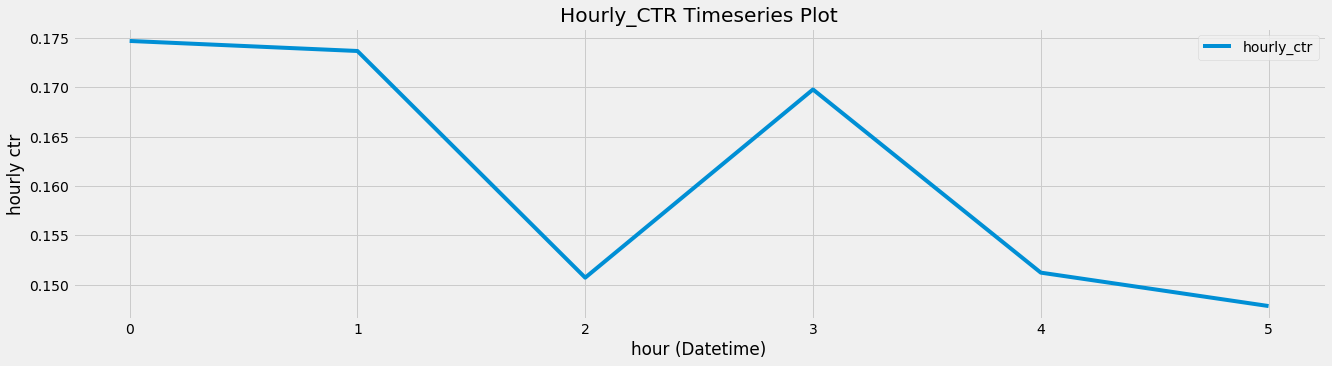

In [67]:
plt.style.use('fivethirtyeight')
ax = ctr.plot(y="hourly_ctr", figsize=(20,5))
ax.set_title('Hourly_CTR Timeseries Plot')
ax.set_xlabel('hour (Datetime)')
ax.set_ylabel('hourly ctr')
plt.show()

## Modeling outlier detection with Interquartile range (IQR)

In [68]:
#Find the upper quartile the 75th percentile value
q3 = ctr['hourly_ctr'].quantile(0.75)
q3

0.17271914356796436

In [69]:
#Find the Lower quartile or the 25th percentile value
q1 = ctr['hourly_ctr'].quantile(0.25)
q1

0.15082342241935207

In [70]:
iqr = q3-q1
iqr

0.021895721148612296

In [71]:
#Finding upper limit of IQR - any values above this limit is considered an outlier
ulimit=q3+(1.5*iqr)
ulimit

0.20556272529088282

In [72]:
llimit=q1-(1.5*iqr)
llimit

0.11797984069643362

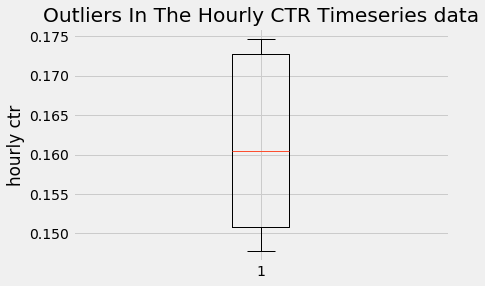

In [73]:
#plotting ctr on a boxplot to show any outliers
plt.figure()
plt.boxplot(ctr['hourly_ctr'], 0, 'gD')
plt.title('Outliers In The Hourly CTR Timeseries data')
plt.ylabel('hourly ctr')
plt.show()


### Inference from boxplot
The Boxplot shows outliers that are below the lower limit of 0.12. But no outlier above the upper limit of 0.22. This observation corresponds with the uppe and lower limit values from the IQR calculations above.

## Outlier Detection using Pycaret Anomaly detection module
Creating a model for outlier detection using pycaret (https://pycaret.org/anomaly-detection/)

PyCaret’s Anomaly Detection Module is an unsupervised machine learning module that is used for identifying rare items, events or observations which raise suspicions by differing significantly from the majority of the data. Typically, the anomalous items will translate to some kind of problem such as bank fraud, a structural defect, medical problems or errors . This module provide several pre-processing features that prepares the data for modeling through setup function. This module has over 12 ready-to-use algorithms and several plots to analyze the results of trained models.

In [74]:
#import anomaly detection module
from pycaret.anomaly import *

In [82]:
#intialize the setup
exp_ano = setup(ctr[['hour', 'hourly_ctr']])

,Description,Value
0,session_id,8552
1,Original Data,"(6, 2)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6, 5)"
9,CPU Jobs,-1


In [83]:
ctr

,hour,hourly_clicks,hourly_impressions,hourly_ctr
0,1970-01-01 00:00:00.014102100,20792,119006,0.174714
1,1970-01-01 00:00:00.014102101,23873,137442,0.173695
2,1970-01-01 00:00:00.014102102,31265,207471,0.150696
3,1970-01-01 00:00:00.014102103,32830,193355,0.169791
4,1970-01-01 00:00:00.014102104,40026,264711,0.151206
5,1970-01-01 00:00:00.014102105,18712,126590,0.147816


In [84]:
# creating a model with iforest
iforest=create_model('iforest')

In [85]:
# generate predictions using trained model
iforest_predictions = predict_model(iforest, data = ctr[['hour', 'hourly_ctr']])

In [86]:
iforest_predictions

,hour,hourly_ctr,Anomaly,Anomaly_Score
0,1970-01-01 00:00:00.014102100,0.174714,0,-0.067633
1,1970-01-01 00:00:00.014102101,0.173695,0,-0.093656
2,1970-01-01 00:00:00.014102102,0.150696,0,-0.126247
3,1970-01-01 00:00:00.014102103,0.169791,0,-0.018235
4,1970-01-01 00:00:00.014102104,0.151206,0,-0.114875
5,1970-01-01 00:00:00.014102105,0.147816,1,0.006078


In [87]:
# Finding the number of outliers - there are 12 outliers predicted as shown on the plot above.
iforest_predictions['Anomaly'].value_counts()

0    5
1    1
Name: Anomaly, dtype: int64

In [88]:
## plotting the model to show the outliers or anomally
plot_model(iforest)

In [89]:
## creating a model using the knn module
knn=create_model('knn')

In [90]:
# assign a model 
knn_df = assign_model(knn)

In [91]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = ctr[['hour', 'hourly_ctr']])

In [92]:
knn_predictions

,hour,hourly_ctr,Anomaly,Anomaly_Score
0,1970-01-01 00:00:00.014102100,0.174714,0,0.024018
1,1970-01-01 00:00:00.014102101,0.173695,0,0.022999
2,1970-01-01 00:00:00.014102102,0.150696,0,0.022999
3,1970-01-01 00:00:00.014102103,0.169791,0,0.019096
4,1970-01-01 00:00:00.014102104,0.151206,0,0.022489
5,1970-01-01 00:00:00.014102105,0.147816,0,0.025879


In [93]:
anomally_imp=knn_predictions[['Anomaly']]

In [94]:
# Finding the number of outliers - there are 12 outliers predicted as shown on the plot above.
anomally_imp.value_counts()

Anomaly
0          6
dtype: int64

In [95]:
## plotting the model to show the outliers or anomally 
plot_model(knn)